# <img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 08 : Naive Bayes</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 1401 | DeadLine: 1st Azar, 13:00 </font></h1>



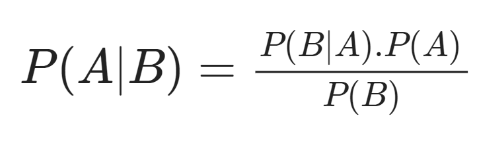

* A and B are two events
* P(A|B) is the probability of event A provided event B has already happened.
* P(B|A) is the probability of event B provided event A has already happened.
* P(A) is the independent probability of A
* P(B) is the independent probability of B

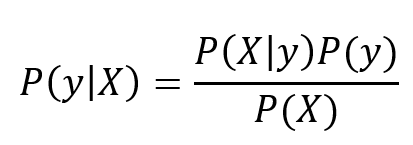

* X = x1,x2,x3,.. xN аre list оf indeрendent рrediсtоrs
* y is the class label
* P(y|X) is the probability of label y given the predictors X

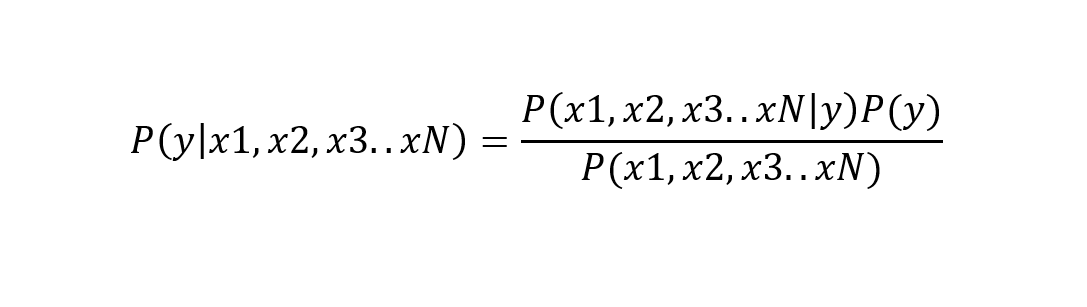

**Naive Bayes model’s assumption that all predictors are independent:** 

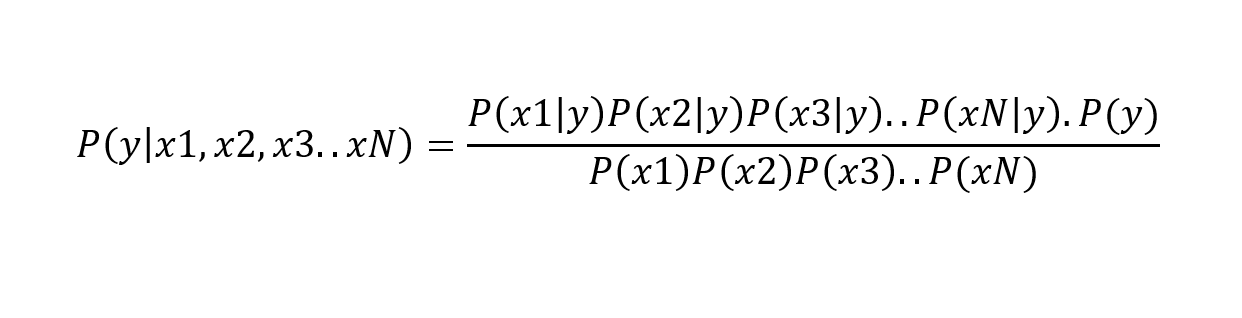

# Step0: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step1: Load Data

In [2]:
iris  = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data = iris.data

In [5]:
target = iris.target

In [6]:
feature_names = iris.feature_names

In [110]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(data, columns=feature_names)
df['Target'] = target

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Step2: Data Overview

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


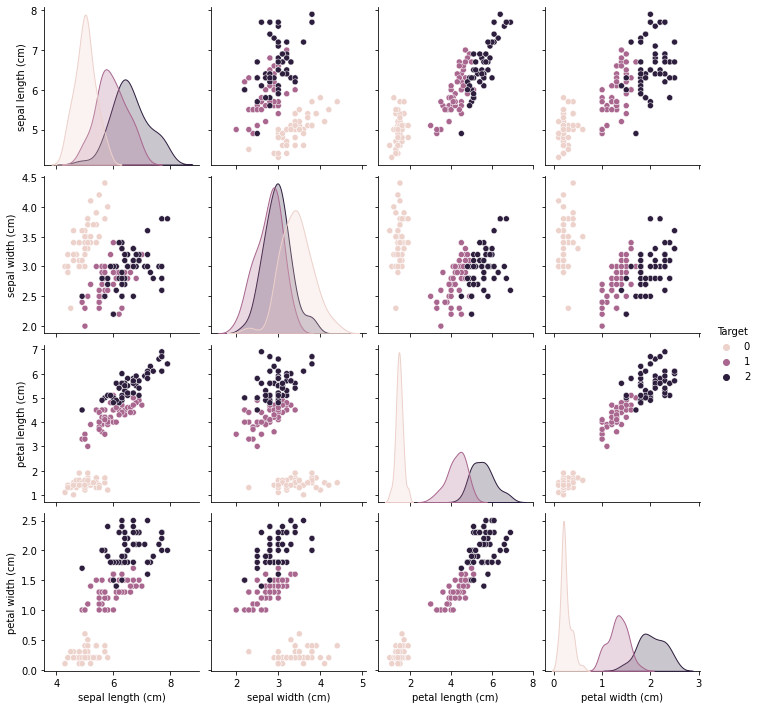

In [11]:
sns.pairplot(df, hue="Target", diag_kind='kde')

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

In [13]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


* The Sepal Width and Length are not correlated. 
* The Petal Width and Length are highly correlated.
* Also, sepal length and petal length are highly correlated.

In [111]:
set(target)

{0, 1, 2}

# Step3: X, y

In [14]:
X1 = df[['petal length (cm)', 'sepal width (cm)']]
y1 = target

In [15]:
X = data
y = target

In [16]:
X.shape

(150, 4)

In [17]:
y.shape

(150,)

# Step4: Split the Data to Train & Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(120, 4)

In [21]:
X_test.shape

(30, 4)

# Step5: Scaling

In [22]:
scaler = StandardScaler()

In [23]:
scaler1 = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
X_test_scaled = scaler.transform(X_test)

In [26]:
X1_train_scaled = scaler1.fit_transform(X1_train)

In [27]:
X1_test_scaled = scaler1.transform(X1_test)

# Step6: Naive Bayes

## Creat the Model

In [28]:
GaussianNB_model = GaussianNB()

In [29]:
GaussianNB_model1 = GaussianNB()

## Train the Model

In [30]:
GaussianNB_model.fit(X_train_scaled, y_train)

GaussianNB()

In [31]:
GaussianNB_model1.fit(X1_train_scaled, y1_train)

GaussianNB()

##  Prediction & Evaluation
<hr>
print classification report

In [32]:
y_pred = GaussianNB_model.predict(X_test_scaled)

In [33]:
y_pred.shape

(30,)

In [34]:
y_pred1 = GaussianNB_model1.predict(X1_test_scaled)

In [35]:
accuracy_score(y_test, y_pred)

1.0

In [36]:
accuracy_score(y_test, y_pred1)

1.0

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
np.matrix([[]])

# Challenge

# Step1: Create Data

In [112]:
# define the number of points
n_samples = 500
mu1, cov1 = np.array([1, 1]), np.array([[1, 0], [0, 1]]) # mean and variance
mu2, cov2 = np.array([3, 3]), np.array([[1, 0], [0, 1]]) # mean and variance

X1 = np.random.multivariate_normal(mu1, cov1, n_samples)
X2 = np.random.multivariate_normal(mu2, cov2, n_samples)

X = np.concatenate((X1, X2), axis=0)
# np.random.shuffle(X)
# print("Dataset shape:", X.shape)

In [113]:
X1

array([[ 1.26638761e+00,  1.64423954e+00],
       [ 1.25382330e+00,  8.96048919e-01],
       [ 1.75170655e+00, -7.26721542e-01],
       [ 2.50816093e+00, -1.20581640e+00],
       [-7.82751466e-01,  4.84945841e-01],
       [ 2.31633084e+00,  2.12232561e+00],
       [ 1.24905131e+00,  1.01712367e+00],
       [-8.58065264e-01,  7.70840129e-01],
       [-1.97100611e-01,  1.14112268e-01],
       [ 1.35263307e+00, -3.73464255e-01],
       [ 1.18727867e+00,  1.35004448e+00],
       [ 9.35549882e-01, -2.95787512e-01],
       [ 1.58344528e+00,  1.47339238e+00],
       [ 3.85177035e-01,  2.81614211e+00],
       [ 1.05097426e+00, -1.19312282e+00],
       [ 6.20097677e-01,  2.00791645e+00],
       [ 7.44422094e-01,  7.99732252e-01],
       [ 9.19423891e-01, -8.90784626e-01],
       [-2.77560322e-04,  5.42055455e-01],
       [ 6.55329096e-01,  3.00254392e+00],
       [ 1.52745162e+00,  1.49691666e+00],
       [ 1.65026360e+00,  9.70626969e-01],
       [ 1.35862521e+00,  2.11914200e+00],
       [-1.

In [40]:
X.shape

(1000, 2)

In [114]:
np.mean(X, axis=0)

array([1.98090041, 1.98674535])

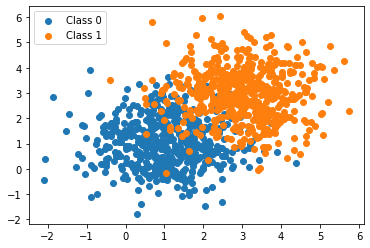

In [41]:
plt.scatter(X1[:, 0], X1[:, 1], label='Class 0')
plt.scatter(X2[:, 0], X2[:, 1], label='Class 1')
plt.legend()
plt.show()

In [42]:
x = X2[0]
x

array([2.05314979, 2.89604732])

In [115]:
for i in X:
    print(i)

[1.26638761 1.64423954]
[1.2538233  0.89604892]
[ 1.75170655 -0.72672154]
[ 2.50816093 -1.2058164 ]
[-0.78275147  0.48494584]
[2.31633084 2.12232561]
[1.24905131 1.01712367]
[-0.85806526  0.77084013]
[-0.19710061  0.11411227]
[ 1.35263307 -0.37346426]
[1.18727867 1.35004448]
[ 0.93554988 -0.29578751]
[1.58344528 1.47339238]
[0.38517704 2.81614211]
[ 1.05097426 -1.19312282]
[0.62009768 2.00791645]
[0.74442209 0.79973225]
[ 0.91942389 -0.89078463]
[-2.77560322e-04  5.42055455e-01]
[0.6553291  3.00254392]
[1.52745162 1.49691666]
[1.6502636  0.97062697]
[1.35862521 2.119142  ]
[-1.54031254  1.42272245]
[ 2.41729647 -0.3157176 ]
[-0.00919565  1.13765337]
[-1.50580582  1.77859657]
[-0.51415927  1.8863498 ]
[1.19623821 0.93384724]
[ 2.71395581 -1.12303712]
[1.02203906 0.81203094]
[0.15253817 1.60676637]
[-1.46535314  0.27407781]
[0.20944286 1.60922113]
[1.39067006 1.77302303]
[2.00533561 1.48046042]
[0.9569354  2.14765688]
[0.50318667 2.30348505]
[0.96878123 2.15157247]
[2.03695685 1.50893665

[4.20715164 3.84362591]
[3.59735898 4.41992436]
[3.33054237 2.29618203]
[2.01833693 4.21507043]
[3.98147938 4.36193183]
[3.46717897 3.04019268]
[3.13532685 3.03122439]
[3.38580412 3.31116677]
[3.85211607 2.56831907]
[2.52272201 2.92643752]
[3.39790462 2.86804648]
[1.40957264 2.61955183]
[2.62880042 1.93803783]
[3.57512802 4.06901483]
[4.80076464 1.20614609]
[2.37945306 3.60379048]
[1.04079882 2.16419842]
[4.12739312 4.74450536]
[3.50373445 3.39451321]
[3.54296103 3.19638041]
[2.76398991 2.57650688]
[3.40980833 2.48315523]
[2.77514307 2.49245126]
[4.69286149 3.83247805]
[2.51624669 3.51540477]
[4.34766652 6.32450615]
[4.36060607 3.92615615]
[3.40998232 2.73398325]
[2.40823053 2.73888299]
[4.70143946 2.05319985]
[4.03202185 1.4278546 ]
[3.42881385 3.38326901]
[2.77932892 3.85161418]
[3.13074358 4.07482533]
[3.27090277 4.15919526]
[2.42240851 2.14965413]
[2.65206563 4.5166528 ]
[5.16561909 2.61489794]
[2.09089171 2.61026641]
[2.6031024  4.31868008]
[4.55193522 1.68390322]
[2.53879673 3.43

# Step2: Implementation of the model

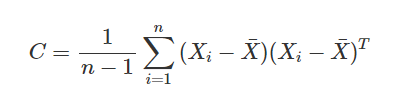

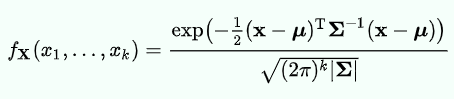

In [43]:
def cov_matrix(a):
    m = a.shape[1]
    n = a.shape[0]
    c = np.zeros((m, m))
    mu = np.mean(a, axis=0)
    print('mu:', mu)
    for i in a:
        c += np.matrix((i - mu)).T @ np.matrix((i - mu))
    return c / (n-1)

In [44]:
cov_matrix(X1)

mu: [1.02295779 1.03748575]


array([[ 1.01655726, -0.008616  ],
       [-0.008616  ,  0.9183249 ]])

In [45]:
def cov_matrix(a):
    
    n = a.shape[0]
    mu = np.mean(a, axis=0)
    return ((a - mu).T @ (a - mu)) / (n-1)

In [46]:
cov_matrix(X)

array([[1.969821  , 0.9400426 ],
       [0.9400426 , 1.93953172]])

In [47]:
np.cov(X.T)

array([[1.969821  , 0.9400426 ],
       [0.9400426 , 1.93953172]])

In [57]:
def parameters(X):
    mean = np.mean(X, axis=0)
    covariance_matrix = cov_matrix(X)
    return mean, covariance_matrix

In [58]:
parameters(X1)

(array([1.02295779, 1.03748575]),
 array([[ 1.01655726, -0.008616  ],
        [-0.008616  ,  0.9183249 ]]))

In [86]:
def Likelihood(x, mean, cov_matrix):
    k = len(x)
    s1 = 1 / (np.sqrt(((2 * np.pi) ** k) * np.linalg.det(cov_matrix)))
    s2 = np.exp(-1/2 * (np.matrix(x - mean) @ inv(cov_matrix) @ np.matrix(x - mean).T))
    
    return s1 * s2

In [87]:
def prior(x, X):
    
    n_X = X.shape[0]
    n_x = x.shape[0]
    
    return n_x / n_X

In [88]:
prior(X1, X)

0.5

In [89]:
Classes=(X1, X2)
X = np.concatenate(Classes, axis=0)

In [90]:
X.shape

(1000, 2)

In [91]:
def GaussianNB_model(x, *Classes):

    X = np.concatenate(Classes, axis=0)
    P = []
    for Class in Classes:
        mean, cov_matrix = parameters(Class)
        P.append(prior(Class, X) * Likelihood(x, mean, cov_matrix))
    return np.argmax(P)

In [95]:
x1 = X1[0]
x1

array([-0.51184989,  0.12807425])

In [96]:
GaussianNB_model(x1, X1, X2)

0

In [98]:
x2 = X2[0]
x2

array([2.05314979, 2.89604732])

In [99]:
GaussianNB_model(x2, X1, X2)

1

# Step3: Predict test sample

In [100]:
test_sample = np.array([1.8, 1.8])

In [101]:
GaussianNB_model(test_sample, X1, X2)

0

In [102]:
def get_parameters(X):
    mean = np.mean(X, axis=0)
    var = np.var(X, axis=0)
    return mean, var

In [103]:
mean, var = get_parameters(X1)

In [104]:
def Likelihood(x, mean, var):

    s1 = 1 / (np.sqrt(2 * np.pi * var))
    s2 = np.exp(-((x - mean) ** 2) / (2 * var))
    
    return s1 * s2

In [105]:
x

array([2.05314979, 2.89604732])

In [106]:
np.prod(Likelihood(x, mean, var))

0.014860649373057618

In [107]:
def prior(x, X):
    
    n_X = X.shape[0]
    n_x = x.shape[0]
    
    return n_x / n_X

In [108]:
def GaussianNB_model(x, *Classes):

    X = np.concatenate(Classes, axis=0)
    P = []
    for Class in Classes:
        mean, var = get_parameters(Class)
        P.append(prior(Class, X) * np.prod(Likelihood(x, mean, var)))
    return np.argmax(P)

In [109]:
GaussianNB_model(test_sample, X1, X2)

0

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>